In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score



In [89]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('Crime_prone_dataset.csv')

In [90]:
df

,District,Event,Circle,Police Station,Caller Source,Event Type,Event Sub-Type,Create Date/Time,Latitude,Longitude
0,LUCKNOW,P01042100004,C1,PS1,PHONE,Information Against Police,Misbehavior By Prv,01-04-2021 00:00,26.834,81.008
1,LUCKNOW,P01042104316,C1,PS1,PHONE,Threat In Person,Attack,01-04-2021 12:09,26.828,81.014
2,LUCKNOW,P01042104847,C1,PS1,PHONE,Dispute,Dispute In Hospital,01-04-2021 12:51,26.840,81.009
3,LUCKNOW,P01042105074,C1,PS1,PHONE,Gambling,Play Cards,01-04-2021 13:10,26.828,81.002
4,LUCKNOW,P01042105152,C1,PS1,PHONE,Threat In Person,Attack,01-04-2021 13:18,26.834,81.033
...,...,...,...,...,...,...,...,...,...,...
5123,LUCKNOW,P30062111143,C2,PS4,PHONE,Dispute,With Neighbor,30-06-2021 17:59,26.866,81.026
5124,LUCKNOW,P30062111164,C2,PS4,PHONE,Dispute,Dispute Between Ride And Driver,30-06-2021 18:01,26.864,81.006
5125,LUCKNOW,P30062111341,C2,PS4,PHONE,Cyber Crimes,Bank Account Hacking,30-06-2021 18:10,26.864,80.998
5126,LUCKNOW,P30062111700,C2,PS4,PHONE,Robbery,On Road,30-06-2021 18:33,26.873,81.023


In [91]:
polic_station = set(df['Police Station'])
polic_station

{'PS1', 'PS2', 'PS3', 'PS4'}

In [92]:
event_type = set(df['Event Type'])
event_type

{'Accident',
 'Accident Explosive',
 'Animals Related',
 'Animals Smugling',
 'Assault/Riot/Commotion',
 'Attempted Murder',
 'Child Crime',
 'Child Crime(Sexual Abuse)',
 'Corona',
 'Crime On Phone Mobile Social Media Internet',
 'Cyber Crimes',
 'Dacoity',
 'Differently Abled People',
 'Dispute',
 'Domestic Violence',
 'Dowry Related Crime',
 'Election Offences-Violation Of Model Code Of Conduct',
 'Encroachment',
 'Escort For Safety',
 'Excise Act Offenses',
 'Female Harrassment',
 'Female Sexual Harrassment',
 'Forgery',
 'Found Deadbody',
 'Gambling',
 'Human Trafficking',
 'Illegal Mining',
 'Information Against Other Government Departments',
 'Information Against Police',
 'Kidnap',
 'Major Fire',
 'Medium Fire',
 'Missing',
 'Murder',
 'Ndps Act Offenses',
 'Personally Threat',
 'Pick Pocket',
 'Police Help Required By 108',
 'Police Help Required By 1090',
 'Pollution',
 'Property Disputes',
 'Robbery',
 'Small Fire',
 'Sos',
 'Suicide',
 'Suicide Attempt',
 'Suspicious Object

In [93]:
event = set(df['Event'])
circle = set(df['Circle'])
caller_source = set(df['Caller Source'])
event_subType = set(df['Event Sub-Type'])

In [94]:
len(event)

5128

In [95]:
caller_source

{'1090',
 'CITZNAPP',
 'EMRI108',
 'NERS112',
 'PHONE',
 'SMS',
 'TWITTER',
 'WhatsApp'}

In [96]:
crime_rates = []
for i in range(len(polic_station)):
    crime_rates.append(0)

In [97]:
crime_rates

[0, 0, 0, 0]

In [98]:
df.set_index('Police Station', inplace = True)


In [99]:
not_crime = ['Accident', 'Accident Explosive', 'Corona', 'Differently Abled People', 'Major Fire', 'Medium Fire',
            'Pollution', 'Small Fire', 'Traffic Jam', 'Unclaimed Information', 'Unknown']
data_event = pd.read_csv('Crime_prone_dataset.csv', index_col = 'Event Type')
for i in not_crime:
    data_event.drop(i, inplace = True)

In [100]:
data_event.head()

,District,Event,Circle,Police Station,Caller Source,Event Sub-Type,Create Date/Time,Latitude,Longitude
Event Type,,,,,,,,,
Information Against Police,LUCKNOW,P01042100004,C1,PS1,PHONE,Misbehavior By Prv,01-04-2021 00:00,26.834,81.008
Threat In Person,LUCKNOW,P01042104316,C1,PS1,PHONE,Attack,01-04-2021 12:09,26.828,81.014
Dispute,LUCKNOW,P01042104847,C1,PS1,PHONE,Dispute In Hospital,01-04-2021 12:51,26.840,81.009
Gambling,LUCKNOW,P01042105074,C1,PS1,PHONE,Play Cards,01-04-2021 13:10,26.828,81.002
Threat In Person,LUCKNOW,P01042105152,C1,PS1,PHONE,Attack,01-04-2021 13:18,26.834,81.033


In [103]:
data_police_station = data_event.set_index('Police Station')
data_police_station

,District,Event,Circle,Caller Source,Event Sub-Type,Create Date/Time,Latitude,Longitude
Police Station,,,,,,,,
PS1,LUCKNOW,P01042100004,C1,PHONE,Misbehavior By Prv,01-04-2021 00:00,26.834,81.008
PS1,LUCKNOW,P01042104316,C1,PHONE,Attack,01-04-2021 12:09,26.828,81.014
PS1,LUCKNOW,P01042104847,C1,PHONE,Dispute In Hospital,01-04-2021 12:51,26.840,81.009
PS1,LUCKNOW,P01042105074,C1,PHONE,Play Cards,01-04-2021 13:10,26.828,81.002
PS1,LUCKNOW,P01042105152,C1,PHONE,Attack,01-04-2021 13:18,26.834,81.033
...,...,...,...,...,...,...,...,...
PS4,LUCKNOW,P30062111143,C2,PHONE,With Neighbor,30-06-2021 17:59,26.866,81.026
PS4,LUCKNOW,P30062111164,C2,PHONE,Dispute Between Ride And Driver,30-06-2021 18:01,26.864,81.006
PS4,LUCKNOW,P30062111341,C2,PHONE,Bank Account Hacking,30-06-2021 18:10,26.864,80.998


In [104]:
crime_rates = {}
for i in polic_station:
    crime_rates[i] = len(data_police_station.loc[i])
crime_rates

{'PS2': 1001, 'PS3': 2057, 'PS4': 609, 'PS1': 604}

In [105]:
crime_rate_num = list(crime_rates.values())
areas = list(crime_rates.keys())
crime_rate_num

[1001, 2057, 609, 604]

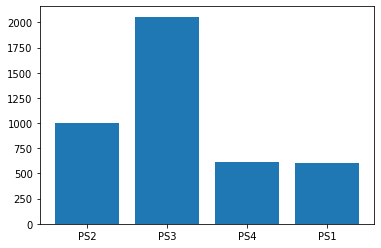

In [106]:
plt.bar(range(len(areas)), crime_rate_num, tick_label=areas)
plt.show()

In [110]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('Crime_prone_dataset.csv')

In [111]:
# Perform exploratory data analysis
print(df.head())
print(df.describe())


  District         Event Circle Police Station Caller Source  \
0  LUCKNOW  P01042100004     C1            PS1         PHONE   
1  LUCKNOW  P01042104316     C1            PS1         PHONE   
2  LUCKNOW  P01042104847     C1            PS1         PHONE   
3  LUCKNOW  P01042105074     C1            PS1         PHONE   
4  LUCKNOW  P01042105152     C1            PS1         PHONE   

                   Event Type       Event Sub-Type  Create Date/Time  \
0  Information Against Police   Misbehavior By Prv  01-04-2021 00:00   
1            Threat In Person               Attack  01-04-2021 12:09   
2                     Dispute  Dispute In Hospital  01-04-2021 12:51   
3                    Gambling           Play Cards  01-04-2021 13:10   
4            Threat In Person               Attack  01-04-2021 13:18   

   Latitude  Longitude  
0    26.834     81.008  
1    26.828     81.014  
2    26.840     81.009  
3    26.828     81.002  
4    26.834     81.033  
          Latitude    Longitude


In [112]:
# Preprocess the data
# Drop irrelevant columns
df = df.drop(['District','Event', 'Circle', 'Caller Source',], axis=1)

In [113]:
# Replace missing values with the mean value of the column
df = df.fillna(df.mean())

label_encoder = LabelEncoder()
df['Police Station'] = label_encoder.fit_transform(df['Police Station'])
print(df['Police Station'])

0       0
1       0
2       0
3       0
4       0
       ..
5123    3
5124    3
5125    3
5126    3
5127    3
Name: Police Station, Length: 5128, dtype: int32


In [114]:
# Normalize the data using StandardScaler

scaler = StandardScaler()

X = df.drop(['Police Station'], axis=1)

# Select only the columns with numeric data types
numeric_cols = X.select_dtypes(include=[np.number]).columns

# Fit and transform the selected columns
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Assign the scaled values back to the original dataframe
df[X.columns] = X
X

,Event Type,Event Sub-Type,Create Date/Time,Latitude,Longitude
0,Information Against Police,Misbehavior By Prv,01-04-2021 00:00,-0.546530,-0.170541
1,Threat In Person,Attack,01-04-2021 12:09,-0.655086,-0.103913
2,Dispute,Dispute In Hospital,01-04-2021 12:51,-0.437974,-0.159436
3,Gambling,Play Cards,01-04-2021 13:10,-0.655086,-0.237169
4,Threat In Person,Attack,01-04-2021 13:18,-0.546530,0.107075
...,...,...,...,...,...
5123,Dispute,With Neighbor,30-06-2021 17:59,0.032435,0.029342
5124,Dispute,Dispute Between Ride And Driver,30-06-2021 18:01,-0.003750,-0.192750
5125,Cyber Crimes,Bank Account Hacking,30-06-2021 18:10,-0.003750,-0.281587
5126,Robbery,On Road,30-06-2021 18:33,0.159083,-0.003972


In [115]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder to the data and transform the data
X_encoded = encoder.fit_transform(X)

In [116]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, df['Police Station'], test_size=0.2, random_state=42)


In [117]:
# Train and evaluate a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print('Decision Tree Classifier Results:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Decision Tree Classifier Results:
Accuracy: 0.9122807017543859
Confusion Matrix:
[[145  13   0   0]
 [  7 225  12   4]
 [  2  20 440  13]
 [  0   4  15 126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       158
           1       0.86      0.91      0.88       248
           2       0.94      0.93      0.93       475
           3       0.88      0.87      0.87       145

    accuracy                           0.91      1026
   macro avg       0.91      0.91      0.91      1026
weighted avg       0.91      0.91      0.91      1026



In [118]:
# Train and evaluate a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(y_pred)
print('Random Forest Classifier Results:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

[2 2 2 ... 1 2 0]
Random Forest Classifier Results:
Accuracy: 0.9103313840155945
Confusion Matrix:
[[128  10  19   1]
 [  4 234  10   0]
 [  1  12 454   8]
 [  0  11  16 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       158
           1       0.88      0.94      0.91       248
           2       0.91      0.96      0.93       475
           3       0.93      0.81      0.87       145

    accuracy                           0.91      1026
   macro avg       0.92      0.88      0.90      1026
weighted avg       0.91      0.91      0.91      1026



In [119]:
# Train and evaluate a Support Vector Machine classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print('Support Vector Machine Classifier Results:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Support Vector Machine Classifier Results:
Accuracy: 0.9317738791423001
Confusion Matrix:
[[127   6  25   0]
 [  5 236   6   1]
 [  2   3 463   7]
 [  0   5  10 130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       158
           1       0.94      0.95      0.95       248
           2       0.92      0.97      0.95       475
           3       0.94      0.90      0.92       145

    accuracy                           0.93      1026
   macro avg       0.94      0.91      0.92      1026
weighted avg       0.93      0.93      0.93      1026



In [120]:
# Train and evaluate a K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_encoded)
y_pred = kmeans.predict(X_encoded)
print('K-means Clustering Results:')
print('Silhouette Score:', silhouette_score(X_encoded, y_pred))
print('Cluster Centers:', kmeans.cluster_centers_)
print(y_pred)

K-means Clustering Results:
Silhouette Score: 0.08164712246479305
Cluster Centers: [[0.00706861 0.0004158  0.02577963 ... 0.0004158  0.         0.0004158 ]
 [0.         0.         0.         ... 0.         0.00064558 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[0 3 1 ... 0 0 3]


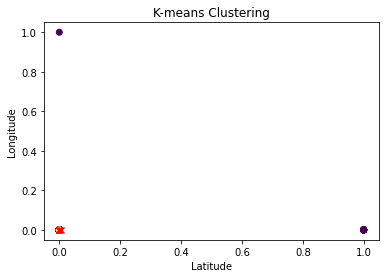

In [20]:
import plotly.express as px

# Assume X_encoded has more than two columns
# Create a new DataFrame with the encoded data and the predicted clusters
# df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out())
# df['cluster'] = y_pred
plt.scatter(X_encoded.toarray()[:, 0], X_encoded.toarray()[:, 1], c=y_pred, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
# Create a parallel coordinates plot of the data
# fig = px.parallel_coordinates(df, color='cluster', color_continuous_scale='viridis')
# fig.show()
plt.title('K-means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [21]:
import pickle

In [22]:
pickle.dump(rf_classifier, open('model.pkl','wb'))

In [23]:
model=pickle.load(open('model.pkl','rb'))

In [24]:
print(model.predict(X_test))

[2 2 2 ... 1 2 0]


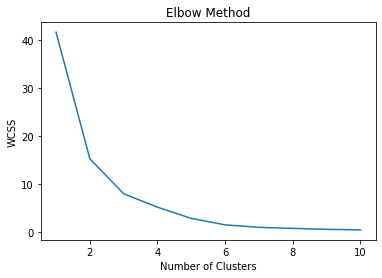

Accuracy: 0.999609984399376
Precision: 0.9996094512790471
Recall: 1.0
F1-Score: 0.9998046875000001
Predictions: [1 1]


In [125]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('Book1.csv')

# Extract the latitude and longitude values
X = data.iloc[:, 1:3].values

# Determine the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plot the elbow curve
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Train the k-means clustering model with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the dataset
data['Cluster'] = y_kmeans

# Create a binary classification label based on the cluster labels
data['Crime_Prone'] = np.where(data['Cluster'] == 0, 1, 0)

# Extract the features and labels for training
X_train = data.iloc[:, [1, 2]].values
y_train = data.iloc[:, 3].values

# Train a logistic regression model
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on new data
X_new = np.array([[42.3601, -71.0589], [40.7128, -74.0060]])
y_pred = classifier.predict(X_new)

# Evaluate the performance of the model
acc = accuracy_score(y_train, classifier.predict(X_train))
prec = precision_score(y_train, classifier.predict(X_train))
rec = recall_score(y_train, classifier.predict(X_train))
f1 = f1_score(y_train, classifier.predict(X_train))
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1-Score:', f1)
print('Predictions:', y_pred)


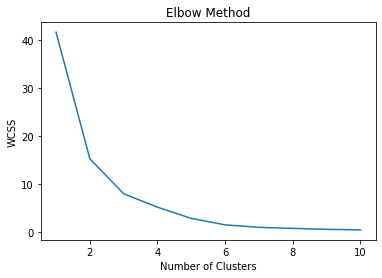

Accuracy: 0.999609984399376
Precision: 0.9996094512790471
Recall: 1.0
F1-Score: 0.9998046875000001
Predictions: [[0. 1.]]
New area 1: 100.00% probability of being crime prone


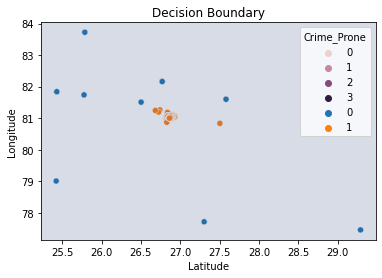

In [37]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Book1.csv')

# Extract the latitude and longitude values
X = data.iloc[:, 1:3].values

# Determine the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
plt.savefig('elbow.png')

# Train the k-means clustering model with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the dataset
data['Cluster'] = y_kmeans

# Create a binary classification label based on the cluster labels
data['Crime_Prone'] = np.where(data['Cluster'] == 0, 1, 0)

# Plot the clusters
sns.scatterplot(data=data, x="Latitude", y="Longitude", hue="Cluster")
plt.title('Cluster Plot')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.savefig('cluster.png')

# Extract the features and labels for training
X_train = data.iloc[:, [1, 2]].values
y_train = data.iloc[:, 3].values

# Train a logistic regression model
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on new data
X_new = np.array([[26.3601, -71.0589]])
y_pred = classifier.predict_proba(X_new)

# Evaluate the performance of the model
acc = accuracy_score(y_train, classifier.predict(X_train))
prec = precision_score(y_train, classifier.predict(X_train))
rec = recall_score(y_train, classifier.predict(X_train))
f1 = f1_score(y_train, classifier.predict(X_train))
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1-Score:', f1)
print('Predictions:', y_pred)
for i, prob in enumerate(y_pred):
    print(f'New area {i+1}: {prob[1]*100:.2f}% probability of being crime prone')

# Plot the decision boundary
sns.scatterplot(data=data, x="Latitude", y="Longitude", hue="Crime_Prone")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.predict(xy).reshape(XX.shape)

# Plot decision boundary
ax.contourf(XX, YY, Z, alpha=0.2)

plt.title('Decision Boundary')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.savefig('boundary.png')


In [17]:
import pickle
pickle.dump(classifier, open('model.pkl','w b'))

In [18]:
model=pickle.load(open('model.pkl','rb'))

In [38]:
Y=model.predict_proba([[26.8467, -81.9462]])

In [39]:
for i, prob in enumerate(Y):
    print(f'New area {i+1}: {prob[1]*100:.2f}% probability of being crime prone')

New area 1: 100.00% probability of being crime prone


In [1]:
import folium
import pandas as pd
data = pd.read_csv('Book1.csv')
# Create a map centered on a specific location
m = folium.Map(location=[26.8467,81.03], zoom_start=12)
folium.Marker([26.8467,81.03]).add_to(m)
# Add markers for each latitude and longitude value
# for index, row in data.iterrows():
#     folium.Marker([row['Latitude'], row['Longitude']]).add_to(m)


m